In [ ]:
!pip install opensmile
import opensmile
import pandas as pd
import numpy as np
import glob
import os
import pickle
import random
import librosa
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
    num_workers=24,
)
scaler = StandardScaler()

Load Data and Extract Feature

In [ ]:
# rangpur_data = glob.glob('/kaggle/input/rangpur-train-test/rangpur/*/*.wav')
# df_rangpur = smile.process_files(rangpur_data)


# ctg_data = glob.glob('/kaggle/input/chittagong-train-test/chittagong/*/*.wav')
# df_ctg = smile.process_files(ctg_data)


# kishor_data = glob.glob('/kaggle/input/kishoreganj-train-test/kishoreganj/*/*.wav')
# df_kishor = smile.process_files(kishor_data)


# narail_data = glob.glob('/kaggle/input/narail-train-test/narail/*/*.wav')
# df_narail = smile.process_files(narail_data)

# narsh_data = glob.glob('/kaggle/input/narsingdi-train-test/narsingdi/*/*.wav')
# df_narsh = smile.process_files(narsh_data)

# macro_data = glob.glob('/kaggle/input/bengaliai-speech-wav-dataset-0/*/*.wav')[:10000]
# df_macro = smile.process_files(macro_data)

In [5]:
df = pd.read_csv("/kaggle/input/ben10/ben10/16_kHz_train_audio/train.csv",sep=",")
df.head()

,file_name,transcriptions,district
0,train_barishal (1).wav,"আসসালামু আলাইকুম, আমার নাম হাসিবুর রহমান শুব, ...",barishal
1,train_barishal (10).wav,<> ভালোই লাগছে। অ্যাসাইনমেন্ট করতে বসছি একটা। ...,barishal
2,train_barishal (100).wav,"আমি তো বলছি ভাই ও আমারে কইবে, মানে তুই কও ক্যা...",barishal
3,train_barishal (103).wav,মোর পছন্দের শখ হইলো গান হোনা। গান হোনতে ব্যাক ...,barishal
4,train_barishal (104).wav,"মুই সকল ধরনের গান হুনি, খালি বলিউডের হিন্দি গা...",barishal


In [7]:
data = glob.glob('/kaggle/input/ben10/ben10/16_kHz_train_audio/*.wav')
df = smile.process_files(data)


KeyboardInterrupt



In [ ]:
df.to_csv('ben10smile-full.csv')
df.head(10)

In [ ]:
# rangpur_data = glob.glob('/kaggle/input/rangpur-train-test/rangpur/*/*.wav')
# df_rangpur = smile.process_files(rangpur_data)


# ctg_data = glob.glob('/kaggle/input/chittagong-train-test/chittagong/*/*.wav')
# df_ctg = smile.process_files(ctg_data)


# kishor_data = glob.glob('/kaggle/input/kishoreganj-train-test/kishoreganj/*/*.wav')
# df_kishor = smile.process_files(kishor_data)


# narail_data = glob.glob('/kaggle/input/narail-train-test/narail/*/*.wav')
# df_narail = smile.process_files(narail_data)

# narsh_data = glob.glob('/kaggle/input/narsingdi-train-test/narsingdi/*/*.wav')
# df_narsh = smile.process_files(narsh_data)

# macro_data = glob.glob('/kaggle/input/bengaliai-speech-wav-dataset-0/*/*.wav')[:10000]
# df_macro = smile.process_files(macro_data)

Concat All Data

In [ ]:
df_barishal = pd.read_csv("/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/barishal_smile.csv",sep=",")
df_chittagong = pd.read_csv("/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/chittagong_smile.csv",sep=",")
df_habiganj = pd.read_csv("/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/habiganj_smile.csv",sep=",")
df_kishoreganj = pd.read_csv("/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/kishoreganj_smile.csv",sep=",")

df_macro = pd.read_csv("/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/macro_smile.csv",sep=",")
df_narail = pd.read_csv("/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/narail_smile.csv",sep=",")
df_narsingdi = pd.read_csv("/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/narsingdi_smile.csv",sep=",")
df_rangpur = pd.read_csv("/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/rangpur_smile.csv",sep=",")

df_sandwip = pd.read_csv("/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/sandwip_smile.csv",sep=",")
df_sylhet = pd.read_csv("/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/sylhet_smile.csv",sep=",")
df_tangail = pd.read_csv("/kaggle/input/ben10smile-bengali-ai-reg-ben-asr-smile-features/tangail_smile.csv",sep=",")


In [9]:
vertical_concat = pd.concat([df_barishal, df_chittagong, df_habiganj, df_kishoreganj, df_narail, df_narsingdi, df_rangpur, df_sandwip, df_sylhet, df_tangail, df_macro], axis=0)
vertical_concat = vertical_concat.dropna().drop_duplicates()
print(vertical_concat.shape)

(24254, 91)


In [10]:
df_barishal['file'].unique()

array(['/kaggle/input/ben10/ben10/16kHz_train_audio/train_barishal (1135).wav',
       '/kaggle/input/ben10/ben10/16kHz_train_audio/train_barishal (1494).wav',
       '/kaggle/input/ben10/ben10/16kHz_train_audio/train_barishal (1459).wav',
       ...,
       '/kaggle/input/ben10/ben10/16kHz_train_audio/train_barishal (24).wav',
       '/kaggle/input/ben10/ben10/16kHz_train_audio/train_barishal (421).wav',
       '/kaggle/input/ben10/ben10/16kHz_train_audio/train_barishal (202).wav'],
      dtype=object)

In [11]:
vertical_columns = vertical_concat.columns.to_list()
vertical_index = vertical_concat.index.tolist()

In [12]:
vertical_columns

['file',
 'start',
 'end',
 'F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3

In [13]:
# Load GENEVA feature set .pkl file
domains = []
for f in vertical_concat['file']:
    filename = f
    domain_name = filename.split("/")[-3]
    if domain_name == 'ben10smile-bengali-ai-reg-ben-asr-smile-features':
        domain_name = 'OOD_Speech'
    domains.append(domain_name)
#domains

In [16]:
domains
unique_domains_set = set(domains)

# Convert the set back to a list if you want to maintain list format
unique_domains_list = list(unique_domains_set)

# Print the unique values
print(unique_domains_list)


['chittagong', 'rangpur', 'sylhet', 'narail', 'tangail', 'OOD_Speech', 'barishal', 'sandwip', 'kishoreganj', 'narsingdi', 'habiganj']


In [15]:
domains = []
for f in vertical_concat['file']:
    temp = f.split('/')[-1].split(' ')[0][6:]
    if '.mp3' in temp:
        domains.append('OOD_Speech')
    else:
        domains.append(temp)

In [17]:
vertical_concat['domain'] = domains
df_normalized =  pd.DataFrame(scaler.fit_transform(vertical_concat[vertical_columns].iloc[:,3:-2]), columns=vertical_columns[3:-2],)
df_normalized

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength
0,-1.038747,0.667148,-1.432898,-0.664147,-0.731340,0.672308,0.650190,0.054589,0.575556,0.269685,...,-1.483384,1.691507,-1.515084,0.943702,-0.754563,-1.031672,0.852972,-0.975372,-0.978823,-0.026319
1,0.585170,-0.737934,0.745654,0.712412,0.425425,-0.284373,-0.680534,-0.781515,0.251116,1.162240,...,-1.557480,1.410215,-0.994225,-0.385013,-0.354604,-0.789582,-0.895809,0.065544,-0.313930,0.569356
2,0.619955,-0.609664,0.798648,0.597556,0.416106,-0.362336,-0.335658,0.008672,0.596297,0.639348,...,1.780238,-0.712092,0.887542,0.324830,0.035098,0.258364,0.357644,-0.080346,-0.200675,-0.339156
3,0.358882,0.127588,0.191979,0.400886,0.337534,0.259686,-0.607823,-0.591961,-0.036446,0.235899,...,1.240996,-1.161254,0.839119,0.887927,-0.595607,0.959239,-0.297435,0.628778,0.729785,-0.400740
4,0.841233,-0.678195,0.980940,0.898759,0.645258,-0.249133,-0.644920,-0.675975,-0.215926,-0.217585,...,1.793460,-0.773739,1.106486,0.346093,0.312781,0.344581,-0.068983,0.325445,1.170560,-0.349771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24249,-0.516639,1.844660,-0.571447,-0.942067,-1.045463,-0.832490,-0.702012,-0.630490,0.427266,-0.427048,...,-1.067724,0.811809,0.502705,0.180608,1.324693,2.836696,0.324459,0.498284,1.000429,-0.656965
24250,0.071590,0.376584,0.222688,0.109238,0.442296,0.375354,-0.934822,-0.958558,-0.026076,-0.646615,...,0.718041,-1.583557,0.562373,-0.427921,-0.576322,-0.932096,-1.204494,-0.381155,-0.328018,1.462574
24251,-0.230748,0.432649,-0.166202,-0.359491,-0.558984,-0.614324,-0.470937,-0.655383,-0.409513,-0.368356,...,1.481914,-1.610325,0.907422,0.634048,0.474306,1.222039,1.286451,-0.808846,-1.036682,-0.243647
24252,0.871336,-0.255378,0.562080,0.958119,0.613165,0.212676,-0.440774,-0.583303,1.170685,1.471645,...,1.364615,-1.664774,1.016979,-0.321955,0.099244,0.250335,-0.325473,-0.195822,-0.868444,-0.099600


In [ ]:
# two_domains = []
# for d in domains:
#     if d == 'OOD_Speech':
#         two_domains.append('OOD_Speech')
#     else:
#         two_domains.append('Regional Dialect')

In [18]:
# fit and transform the dataframe using the scaler object
# df_normalized = pd.DataFrame(scaler.fit_transform(vertical_concat[vertical_columns]), columns=vertical_columns,)
df_normalized["domains"] = domains
#df_normalized["domains"] = df_normalized["domains"].apply(lambda x: "OpenSLR" if x.startswith("0") else x) 
#df_normalized["domains"] = df_normalized["domains"].apply(lambda x: domain_name_map[x] if x in domain_name_map.keys() else x)

df_normalized = df_normalized[df_normalized['domains']!='OOD_Speech']

labels = df_normalized["domains"].unique().tolist()
colors = plt.cm.get_cmap('tab20').colors
color_map = {label: colors[i % len(colors)] for i, label in enumerate(labels)}
color_map["MaCro train"] = (1,.25,.05)
domain_color = [color_map[x] for x in df_normalized['domains']]
print(labels)

['barishal', 'chittagong', 'habiganj', 'kishoreganj', 'narail', 'narsingdi', 'rangpur', 'sandwip', 'sylhet', 'tangail']


/tmp/ipykernel_32/206412198.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20').colors


['F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNorm',
 'mfcc4_

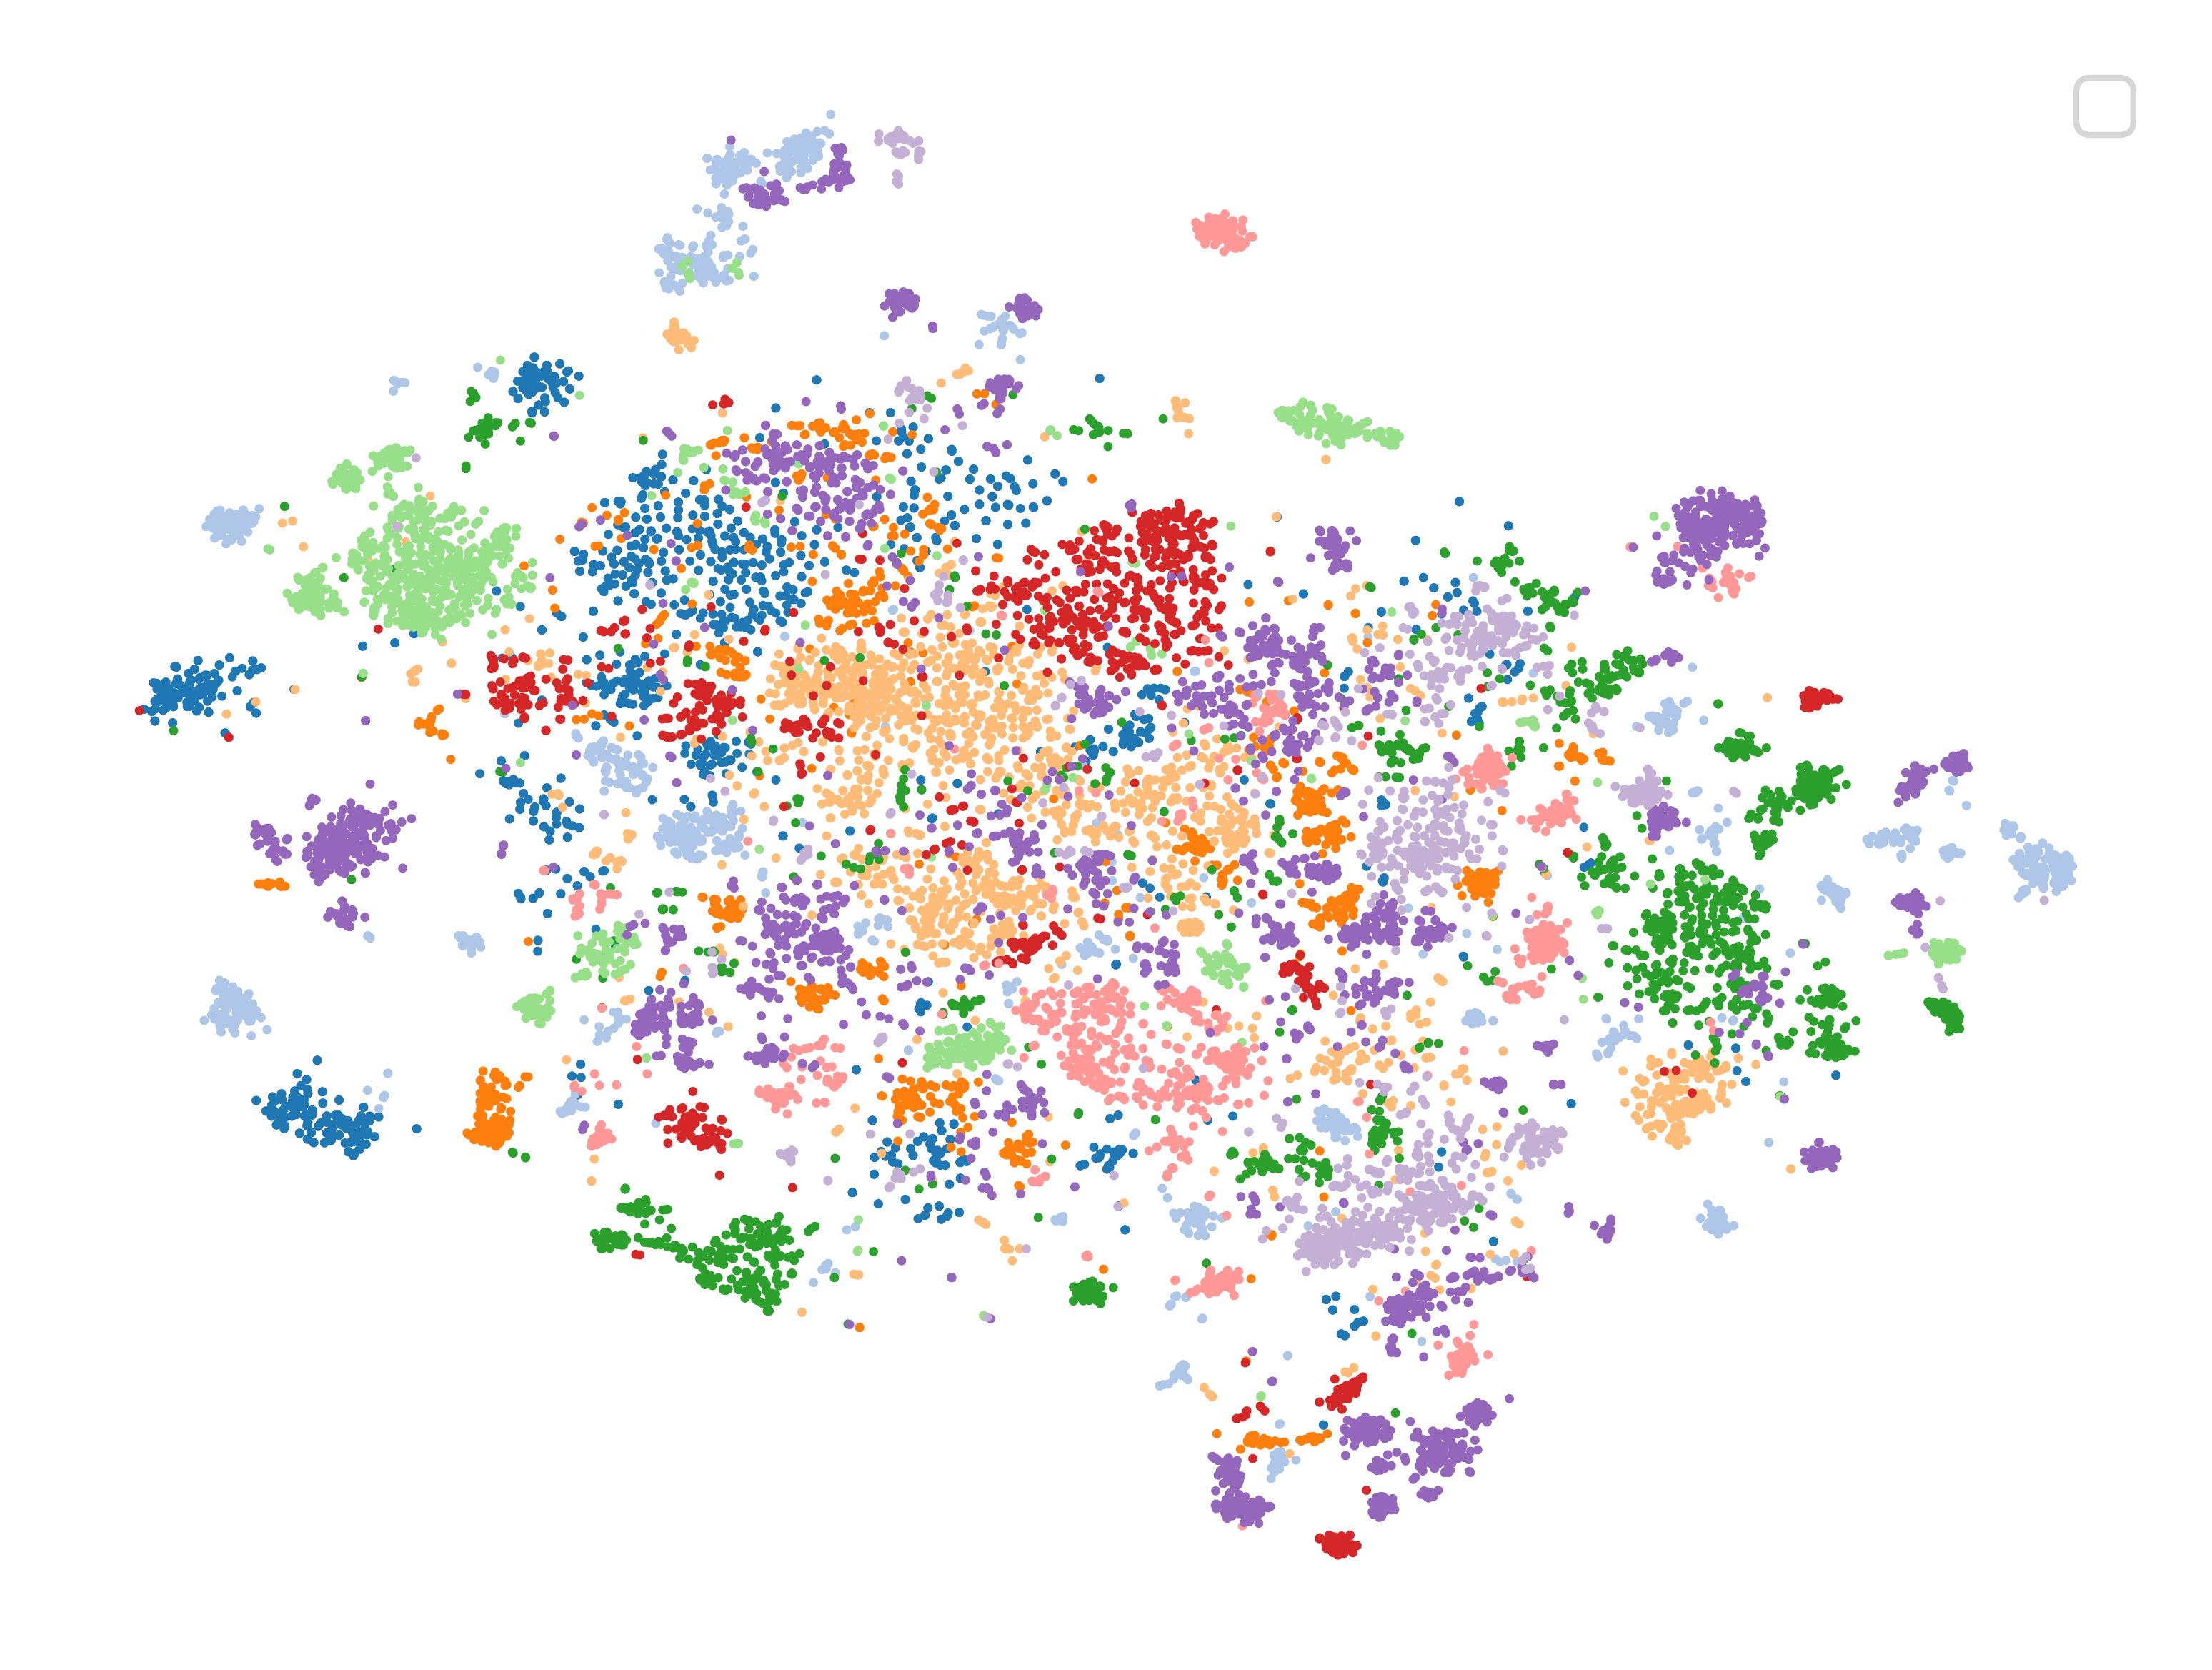

In [14]:
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.size'] = '12'
# Perform t-SNE on the feature set
tsne = TSNE(n_components=2, random_state=44, perplexity=90, metric="l2", n_iter=5000, early_exaggeration=50.0)
tsne_results = tsne.fit_transform(df_normalized[vertical_columns[3:-2]])
# Plot t-SNE results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s = .3, c=domain_color)
plt.axis('off')
plt.legend()
plt.show()

In [19]:
import seaborn as sns
tsne_df   = pd.DataFrame(tsne_results)
htw = tsne_df.to_numpy(copy = True)
tsne_df['tsne_x'] = htw[:, 0]
tsne_df['tsne_y'] = htw[:, 1]
tsne_df.head()
my_cmap = sns.color_palette(list(color_map.values()))
plt.rcParams['figure.dpi'] = 600

sns.scatterplot(
      x       = "tsne_x",
      y       = "tsne_y",
      hue= df_normalized.domains.to_list(),
      data    = tsne_df,
      alpha   = 0.9,
      s= 2,
      palette = my_cmap
   )


plt.legend( loc = 'best', ncol= 4, fontsize= 6, bbox_to_anchor=(1.1,0), frameon=False)
plt.axis('off')

plt.savefig('10_district_SNE.png', bbox_inches='tight')

plt.show()


NameError: name 'tsne_results' is not defined

In [20]:
print(df_normalized.shape)

(14254, 87)


In [21]:
df_normalized['domains'].value_counts()

domains
sylhet         2935
kishoreganj    1654
barishal       1554
narail         1501
chittagong     1416
narsingdi      1106
sandwip        1054
rangpur        1045
tangail        1043
habiganj        946
Name: count, dtype: int64

In [22]:
habiganj = df_normalized[df_normalized["domains"] == "habiganj"]
habiganj = habiganj.drop(columns=["domains"])
habiganj = habiganj[:1321]
print(habiganj.shape)
habiganj_values = habiganj.values

(946, 86)


In [23]:
tangail = df_normalized[df_normalized["domains"] == "tangail"]
tangail = tangail.drop(columns=["domains"])
tangail = tangail[:1321]
print(tangail.shape)
tangail_values = tangail.values

(1043, 86)


In [24]:
sandwip = df_normalized[df_normalized["domains"] == "sandwip"]
sandwip = sandwip.drop(columns=["domains"])
sandwip = sandwip[:1321]
print(sandwip.shape)
sandwip_values = sandwip.values

(1054, 86)


In [25]:
barishal = df_normalized[df_normalized["domains"] == "barishal"]
barishal = barishal.drop(columns=["domains"])
barishal = barishal[:1321]
print(barishal.shape)
barishal_values = barishal.values

(1321, 86)


In [32]:
sylhet = df_normalized[df_normalized["domains"] == "sylhet"]
sylhet = sylhet.drop(columns=["domains"])
sylhet = sylhet[:1321]
print(sylhet.shape)
sylhet_values = sylhet.values


(1321, 86)


In [26]:
rangpur = df_normalized[df_normalized["domains"] == "rangpur"]
rangpur = rangpur.drop(columns=["domains"])
rangpur = rangpur[:1321]
print(rangpur.shape)
rangpur_values = rangpur.values


(1045, 86)


In [27]:
kishoreganj = df_normalized[df_normalized["domains"] == "kishoreganj"]
kishoreganj = kishoreganj.drop(columns=["domains"])
kishoreganj = kishoreganj[:1321]
print(kishoreganj.shape)
kishoreganj_values = kishoreganj.values


(1321, 86)


In [28]:
narail = df_normalized[df_normalized["domains"] == "narail"]
narail = narail.drop(columns=["domains"])
narail = narail[:1321]
print(narail.shape)
narail_values = narail.values

(1321, 86)


In [29]:
chittagong = df_normalized[df_normalized["domains"] == "chittagong"]
chittagong = chittagong.drop(columns=["domains"])
chittagong = chittagong[:1321]
print(chittagong.shape)
chittagong_values = chittagong.values

(1321, 86)


In [30]:
narsingdi = df_normalized[df_normalized["domains"] == "narsingdi"]
narsingdi = narsingdi.drop(columns=["domains"])
narsingdi = narsingdi[:1321]
print(narsingdi.shape)
narsingdi_values = narsingdi.values

(1106, 86)


In [33]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.stats import entropy

def kl(P, Q):
    epsilon = 0.00001

    # You may want to instead make copies to avoid changing the np arrays.
    P = P + epsilon
    Q = Q + epsilon
    divergence = np.sum(P * np.log(P / Q))
    return divergence

num_bins = 85
idx = list(range(85))
cols_rangpur = []
cols_chittagong = []
cols_narail = []
cols_kishoreganj = []
cols_narsingdi = []
cols_sylhet = []
cols_barishal = []
cols_sandwip = []
cols_tangail  = []
cols_habiganj = []

kl_divs = []
sigma = 1

for i in idx:
    _, bins = np.histogram(
        np.concatenate([rangpur_values[:, i], chittagong_values[:, i], narail_values[:, i], kishoreganj_values[:, i], narsingdi_values[:, i],
                       sylhet_values[:, i],barishal_values[:, i],sandwip_values[:, i],tangail_values[:, i],habiganj_values[:, i]],
                       axis=0),num_bins)
    hist1, _ = np.histogram(rangpur_values[:, i], bins)
    cols_rangpur.append(hist1)

    hist2, _ = np.histogram(chittagong_values[:, i], bins)
    cols_chittagong.append(hist2)

    hist3, _ = np.histogram(narail_values[:, i], bins)
    cols_narail.append(hist3)

    hist4, _ = np.histogram(kishoreganj_values[:, i], bins)
    cols_kishoreganj.append(hist4)

    hist5, _ = np.histogram(narsingdi_values[:, i], bins)
    cols_narsingdi.append(hist5)
    
    hist6, _ = np.histogram(sylhet_values[:, i], bins)
    cols_sylhet.append(hist6)
                                                                                                                
    hist7, _ = np.histogram(barishal_values[:, i], bins)
    cols_barishal.append(hist7)                                                                                                            
                                                                                                                
    hist8, _ = np.histogram(sandwip_values[:, i], bins)
    cols_sandwip.append(hist8)
                                                                                                                
    hist9, _ = np.histogram(tangail_values[:, i], bins)
    cols_tangail.append(hist9)
    
    hist10, _ = np.histogram(habiganj_values[:, i], bins)
    cols_habiganj.append(hist10)   
    
    smooth=[]

    smooth.append(gaussian_filter(hist1, sigma))
    smooth.append(gaussian_filter(hist2, sigma))
    smooth.append(gaussian_filter(hist3, sigma))
    smooth.append(gaussian_filter(hist4, sigma))
    smooth.append(gaussian_filter(hist5, sigma))
    smooth.append(gaussian_filter(hist6, sigma))
    smooth.append(gaussian_filter(hist7, sigma))
    smooth.append(gaussian_filter(hist8, sigma))
    smooth.append(gaussian_filter(hist9, sigma))
    smooth.append(gaussian_filter(hist10, sigma))
    
    for i in range(1,9):
        kl_div = kl(smooth[i], smooth[i+1])
        kl_divs.append(kl_div)
        

img_rangpur = np.vstack(cols_rangpur).T
img_chittagong = np.vstack(cols_chittagong).T
img_narail = np.vstack(cols_narail).T
img_kishoreganj = np.vstack(cols_kishoreganj).T
img_narsingdi = np.vstack(cols_narsingdi).T
img_sylhet = np.vstack(cols_sylhet).T
img_barishal = np.vstack(cols_barishal).T
img_sandwip = np.vstack(cols_sandwip).T
img_tangail = np.vstack(cols_tangail).T
img_habiganj = np.vstack(cols_habiganj).T

print(img_rangpur.shape)
print(img_chittagong.shape)
print(img_narail.shape)
print(img_kishoreganj.shape)
print(img_narsingdi.shape)
print(img_sylhet.shape)
print(img_barishal.shape)
print(img_sandwip.shape)
print(img_tangail.shape)
print(img_habiganj.shape)


# Calculate the normalized KL divergence values
norm = [float(i) / sum(kl_divs) for i in kl_divs]
print(norm)


(85, 85)
(85, 85)
(85, 85)
(85, 85)
(85, 85)
(85, 85)
(85, 85)
(85, 85)
(85, 85)
(85, 85)
[0.0005664732082739702, 0.001498026235170421, 0.002064095520163639, 0.006473371101489208, 0.005529173092448094, 0.007255318323327913, 0.00063368956761027, 0.0007283963484337738, 0.003327601441733027, 0.00019242343225409826, 0.005518665134411319, -0.00022107530617249387, 0.001043879486339091, 0.002265627512998298, 0.0006643311448132602, 0.0012304476337038647, 0.0008363800072415759, 0.0007809885994278767, 0.003208781248199989, 0.009154509392343238, 0.002204114164527222, 0.005369178208390782, 0.0004756623583932427, 0.0007434215786759887, 0.0007497035551757626, 0.001333807970540523, 0.0024169664708799644, 0.004685855771457968, 0.0065582783996241, 0.007995552466364074, 0.0005991886808449985, 0.0006319108785370242, 0.0009229212907217358, 0.00099824789207332, 0.0023879213504845193, 0.002527105522313998, 0.006338727628514509, 0.008723719493719308, 0.0009067924573068235, 0.0006466969631577993, 0.0025930576

In [ ]:
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.size'] = '12'
plt.imshow(np.log(img_rangpur+1))
# plt.title('Train set GENEVA features histograms')
plt.axis("off")
plt.savefig("rangpur_geneva_hmap.png", dpi=600)

plt.imshow(np.log(img_chittagong+1))
# plt.title('Train set GENEVA features histograms')
plt.axis("off")
plt.savefig("chittagong_geneva_hmap.png", dpi=600)

plt.imshow(np.log(img_narail+1))
# plt.title('Train set GENEVA features histograms')
plt.axis("off")
plt.savefig("narail_geneva_hmap.png", dpi=600)

plt.imshow(np.log(img_kishoreganj+1))
# plt.title('Train set GENEVA features histograms')
plt.axis("off")
plt.savefig("kishoreganj_geneva_hmap.png", dpi=600)

plt.imshow(np.log(img_narsingdi+1))
# plt.title('Train set GENEVA features histograms')
plt.axis("off")
plt.savefig("narshingdi_geneva_hmap.png", dpi=600)

plt.imshow(np.log(img_sylhet+1))
# plt.title('Train set GENEVA features histograms')
plt.axis("off")
plt.savefig("sylhet_geneva_hmap.png", dpi=600)

plt.imshow(np.log(img_barishal+1))
# plt.title('Train set GENEVA features histograms')
plt.axis("off")
plt.savefig("barishal_geneva_hmap.png", dpi=600)

plt.imshow(np.log(img_sandwip+1))
# plt.title('Train set GENEVA features histograms')
plt.axis("off")
plt.savefig("sandwip_geneva_hmap.png", dpi=600)

plt.imshow(np.log(img_tangail+1))
# plt.title('Train set GENEVA features histograms')
plt.axis("off")
plt.savefig("tangail_geneva_hmap.png", dpi=600)

plt.imshow(np.log(img_habiganj+1))
# plt.title('Train set GENEVA features histograms')
plt.axis("off")
plt.savefig("habiganj_geneva_hmap.png", dpi=600)



In [31]:
print(rangpur_values)

[[-0.64384955  0.11921945 -0.84844922 ...  0.63721137  0.46663863
  -0.21376472]
 [ 2.93460942 -0.66528219  2.96427419 ... -0.21371878 -0.3370022
  -0.44342349]
 [ 0.04274788 -0.75620043  0.22783338 ... -0.61987173 -0.59958442
  -0.22575733]
 ...
 [-0.58924146 -0.04103763 -1.08508111 ...  0.23424442  0.39919819
   0.17378021]
 [ 0.3833125   0.05721013  0.02542136 ...  0.37731349  1.21922907
  -0.44319377]
 [ 0.28845945  0.73292045  0.09665895 ...  0.47972532  1.58704356
  -0.36268366]]


In [34]:
vertical_columns = vertical_columns[3:-2]

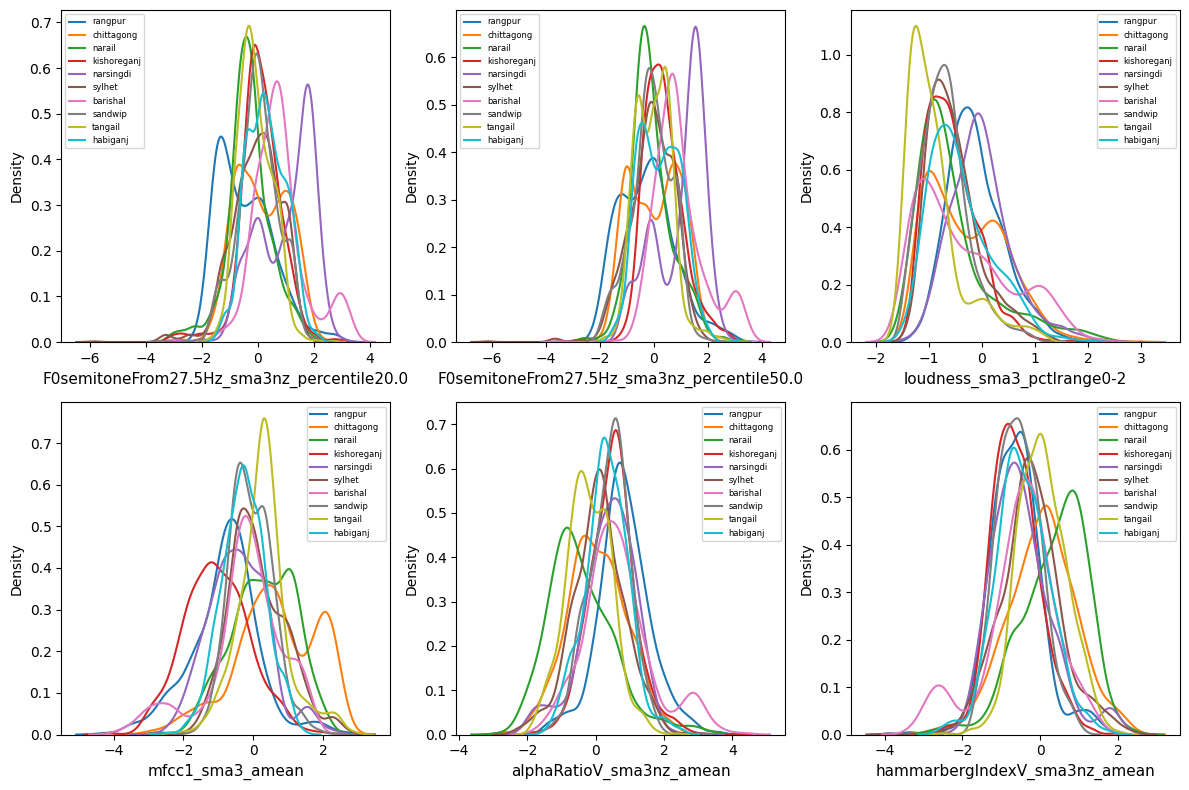

In [36]:
# KDE visualization
import matplotlib.pyplot as plt
import seaborn as sns


target_idx = [2, 3, 15, 22, 58, 60]
num_rows = 2
num_cols = 3


fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))


for i, ax in enumerate(axs.ravel()):
    if i < len(target_idx):
        idx = target_idx[i]
        
        # Plot each region as a KDE plot
        sns.kdeplot(rangpur_values[:, idx], label='rangpur', ax=ax)
        sns.kdeplot(chittagong_values[:, idx], label='chittagong', ax=ax)
        sns.kdeplot(narail_values[:, idx], label='narail', ax=ax)
        sns.kdeplot(kishoreganj_values[:, idx], label='kishoreganj', ax=ax)
        sns.kdeplot(narsingdi_values[:, idx], label='narsingdi', ax=ax)
        sns.kdeplot(sylhet_values[:, idx], label='sylhet', ax=ax)
        sns.kdeplot(barishal_values[:, idx], label='barishal', ax=ax)
        sns.kdeplot(sandwip_values[:, idx], label='sandwip', ax=ax)
        sns.kdeplot(tangail_values[:, idx], label='tangail', ax=ax)
        sns.kdeplot(habiganj_values[:, idx], label='habiganj', ax=ax)

       
        ax.set_xlabel(vertical_columns[idx], fontsize=11)
#         ax.set_title(f'Index {idx}', fontsize=8)
        ax.legend(fontsize=6)
        ax.axis("on")


plt.tight_layout()
plt.savefig("kde_plots.png", dpi=300, bbox_inches="tight")
plt.show()
# 58 60 2 3 22 15

In [ ]:
# KDE visualization 2x2
import matplotlib.pyplot as plt
import seaborn as sns


target_idx = [2,  15, 22, 60]
num_rows = 2
num_cols = 2


fig, axs = plt.subplots(num_rows, num_cols, figsize=(11, 7))
legend_handles = []


for i, ax in enumerate(axs.ravel()):
    if i < len(target_idx):
        idx = target_idx[i]
        
        # Plot each region as a KDE plot
        sns.kdeplot(rangpur_values[:, idx], label='rangpur', ax=ax)
        sns.kdeplot(chittagong_values[:, idx], label='chittagong', ax=ax)
        sns.kdeplot(narail_values[:, idx], label='narail', ax=ax)
        sns.kdeplot(kishoreganj_values[:, idx], label='kishoreganj', ax=ax)
        sns.kdeplot(narsingdi_values[:, idx], label='narsingdi', ax=ax)
        sns.kdeplot(sylhet_values[:, idx], label='sylhet', ax=ax)
        sns.kdeplot(barishal_values[:, idx], label='barishal', ax=ax)
        sns.kdeplot(sandwip_values[:, idx], label='sandwip', ax=ax)
        sns.kdeplot(tangail_values[:, idx], label='tangail', ax=ax)
        sns.kdeplot(habiganj_values[:, idx], label='habiganj', ax=ax)

        if not legend_handles:
            legend_handles = ax.get_legend_handles_labels()
            

         
        ax.set_xlabel(vertical_columns[idx], fontsize=18)        
        ax.set_ylabel("Density",fontsize=18)

#         ax.get_legend().remove()  # Remove legend for individual plots
#         ax.set_title(f'Index {idx}', fontsize=8)
#         ax.legend(fontsize=6)
        ax.axis("on")

# fig.legend(*legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5, fontsize=10)
fig.legend(*legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=5, fontsize=10)
plt.tight_layout()
plt.savefig("kde_plots.png", dpi=300, bbox_inches="tight")
plt.show()
# 58 60 2 3 22 15

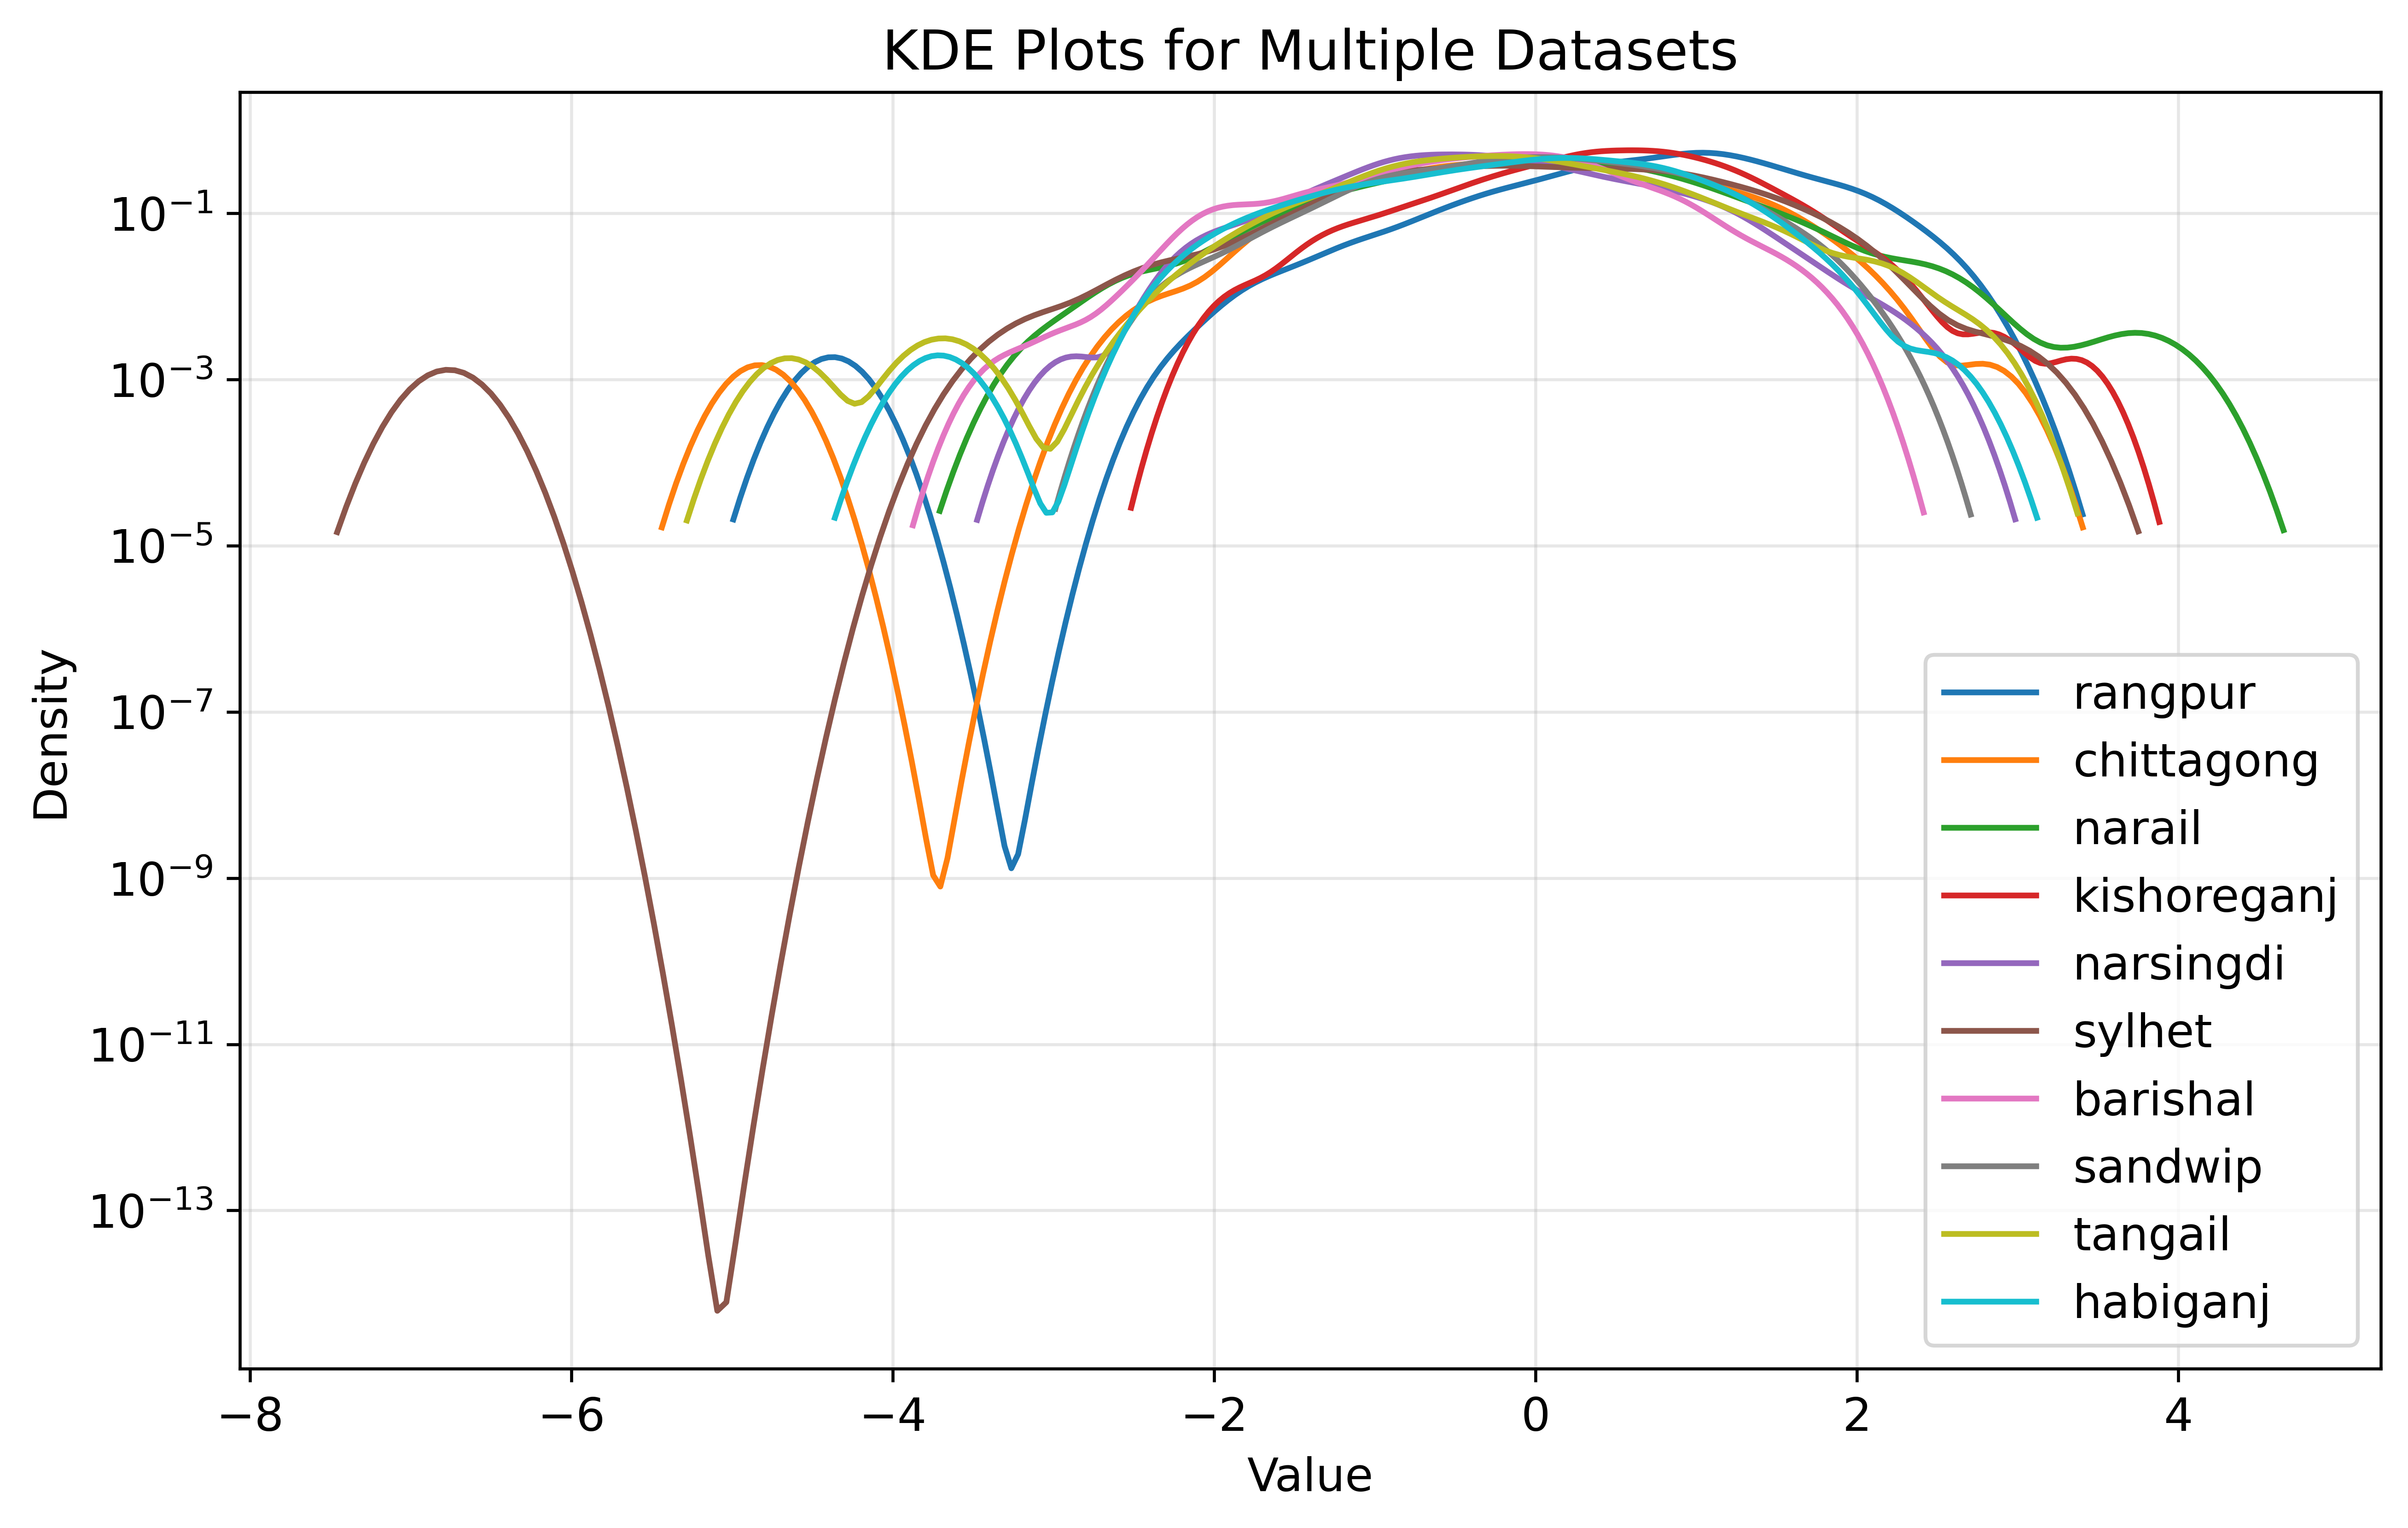

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target indices
target_idx = [47]

# Create a single figure with one subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Create KDE plots for each dataset at the target index
for idx in target_idx:
    sns.kdeplot(rangpur_values[:, idx], label='rangpur', ax=ax)
    sns.kdeplot(chittagong_values[:, idx], label='chittagong', ax=ax)
    sns.kdeplot(narail_values[:, idx], label='narail', ax=ax)
    sns.kdeplot(kishoreganj_values[:, idx], label='kishoreganj', ax=ax)
    sns.kdeplot(narsingdi_values[:, idx], label='narsingdi', ax=ax)
    sns.kdeplot(sylhet_values[:, idx], label='sylhet', ax=ax)
    sns.kdeplot(barishal_values[:, idx], label='barishal', ax=ax)
    sns.kdeplot(sandwip_values[:, idx], label='sandwip', ax=ax)
    sns.kdeplot(tangail_values[:, idx], label='tangail', ax=ax)
    sns.kdeplot(habiganj_values[:, idx], label='habiganj', ax=ax)

# Set the y-axis scale to log (if desired)
ax.set_yscale('log')

# Set labels and titles
ax.set_xlabel('Value')
ax.set_ylabel('Density')  # Add a y-axis label for clarity
ax.set_title('KDE Plots for Multiple Datasets')
ax.legend()

# Add a grid for better readability
ax.grid(True, alpha=0.3)
plt.savefig("kde_plots_.png", dpi=300, bbox_inches="tight")

# Display the figure
plt.show()
